In [ ]:
import pandas as pd
from src.utils.paths import INTERIM_DIR
from src.features.feature_engineering import (build_features)

df_interim = pd.read_parquet(INTERIM_DIR / "sensor_496.parquet")

cols_to_keep = ['Id_Instal', 'Noise_db', 'hour', 'day_of_week', 'month', 'year','Latitud', 'Longitud']
df_features = build_features(df_interim, cols_to_keep=cols_to_keep)

df_features.head()

ModuleNotFoundError: No module named 'src'

In [ ]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70728 entries, 2015-12-07 00:00:00 to 2023-12-31 23:00:00
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id_Instal                 70728 non-null  float64
 1   Noise_db                  70728 non-null  float64
 2   hour                      70728 non-null  int32  
 3   day_of_week               70728 non-null  int32  
 4   month                     70728 non-null  int32  
 5   year                      70728 non-null  int32  
 6   Latitud                   70728 non-null  float64
 7   Longitud                  70728 non-null  float64
 8   is_weekend                70728 non-null  int64  
 9   Lockdown_During lockdown  70728 non-null  bool   
 10  Lockdown_Post-lockdown    70728 non-null  bool   
 11  Lockdown_Pre-lockdown     70728 non-null  bool   
 12  public_holiday            70728 non-null  int64  
 13  Noise_db_lag_1            

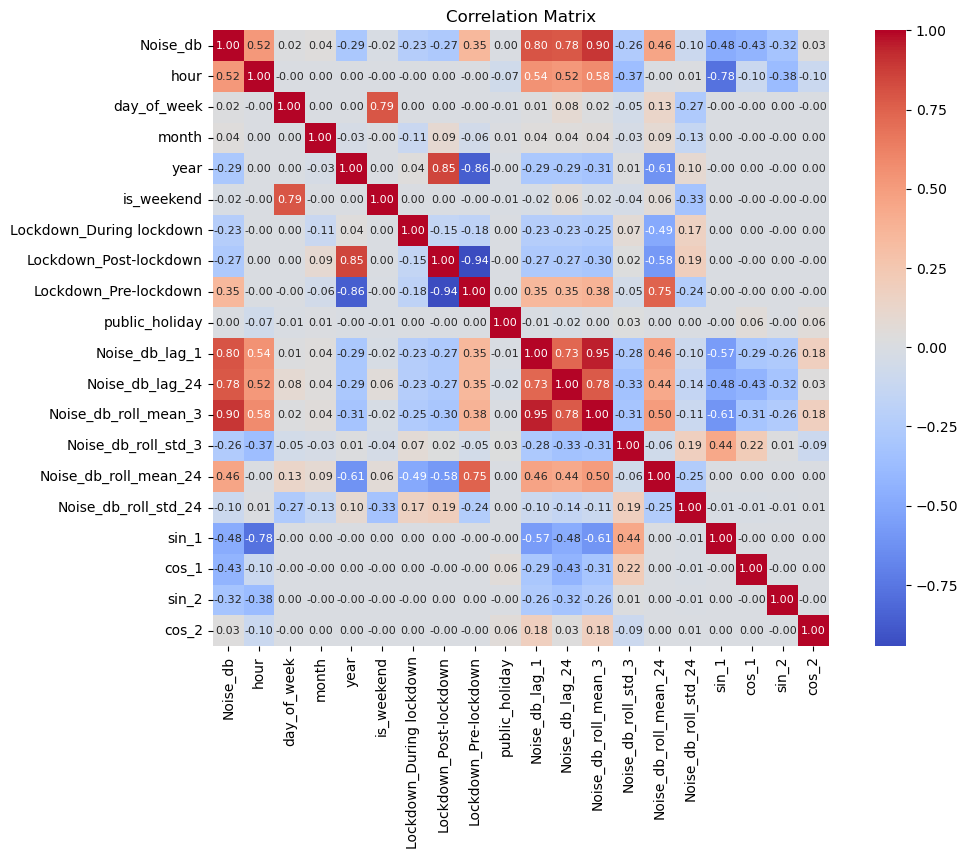

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_features.drop(columns=["Id_Instal", "Latitud", "Longitud"], inplace=True)
corr_matrix = df_features.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, annot_kws={"size": 8})
plt.title("Correlation Matrix")
plt.show()